In [50]:
import torch
from torch.utils.data import Dataset, DataLoader
import os
from PIL import Image
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset_dir = 'VOC2012/VOCdevkit/VOC2012/'

In [3]:
os.listdir(dataset_dir)

['Annotations',
 'ImageSets',
 'JPEGImages',
 'SegmentationClass',
 'SegmentationObject']

In [4]:
img_dir = dataset_dir + 'JPEGImages/'
imgset_dir = dataset_dir + 'ImageSets/'
os.listdir(imgset_dir)

['Action', 'Layout', 'Main', 'Segmentation']

In [5]:
len(os.listdir(img_dir))

17125

In [6]:
os.listdir(img_dir)[0]

'2007_000027.jpg'

In [7]:
main_imgset_dir = imgset_dir + 'Main'
list_directory = os.listdir(main_imgset_dir)
test_main_file = os.listdir(main_imgset_dir)[2]

In [8]:
list_directory

['aeroplane_train.txt',
 'aeroplane_trainval.txt',
 'aeroplane_val.txt',
 'bicycle_train.txt',
 'bicycle_trainval.txt',
 'bicycle_val.txt',
 'bird_train.txt',
 'bird_trainval.txt',
 'bird_val.txt',
 'boat_train.txt',
 'boat_trainval.txt',
 'boat_val.txt',
 'bottle_train.txt',
 'bottle_trainval.txt',
 'bottle_val.txt',
 'bus_train.txt',
 'bus_trainval.txt',
 'bus_val.txt',
 'car_train.txt',
 'car_trainval.txt',
 'car_val.txt',
 'cat_train.txt',
 'cat_trainval.txt',
 'cat_val.txt',
 'chair_train.txt',
 'chair_trainval.txt',
 'chair_val.txt',
 'cow_train.txt',
 'cow_trainval.txt',
 'cow_val.txt',
 'diningtable_train.txt',
 'diningtable_trainval.txt',
 'diningtable_val.txt',
 'dog_train.txt',
 'dog_trainval.txt',
 'dog_val.txt',
 'horse_train.txt',
 'horse_trainval.txt',
 'horse_val.txt',
 'motorbike_train.txt',
 'motorbike_trainval.txt',
 'motorbike_val.txt',
 'person_train.txt',
 'person_trainval.txt',
 'person_val.txt',
 'pottedplant_train.txt',
 'pottedplant_trainval.txt',
 'pottedplan

In [9]:
test_file = os.path.join(main_imgset_dir, test_main_file)
print(test_file)

with open(test_file, 'r') as file:
    lines = file.readlines()
    print("Length of this file:", len(lines))
    for line in lines:
        print(line.strip())

VOC2012/VOCdevkit/VOC2012/ImageSets/Main/aeroplane_val.txt
Length of this file: 5823
2008_000002 -1
2008_000003 -1
2008_000007 -1
2008_000009 -1
2008_000016 -1
2008_000021  1
2008_000026 -1
2008_000027 -1
2008_000032 -1
2008_000034 -1
2008_000042 -1
2008_000043 -1
2008_000050 -1
2008_000051 -1
2008_000052 -1
2008_000054 -1
2008_000056 -1
2008_000059 -1
2008_000062 -1
2008_000064  1
2008_000067 -1
2008_000073 -1
2008_000075 -1
2008_000076 -1
2008_000078 -1
2008_000080 -1
2008_000082 -1
2008_000084 -1
2008_000090 -1
2008_000107 -1
2008_000115 -1
2008_000116 -1
2008_000119 -1
2008_000120 -1
2008_000123 -1
2008_000133 -1
2008_000134 -1
2008_000138 -1
2008_000140 -1
2008_000145 -1
2008_000149 -1
2008_000163 -1
2008_000174 -1
2008_000177 -1
2008_000182 -1
2008_000183 -1
2008_000190 -1
2008_000194 -1
2008_000195 -1
2008_000203 -1
2008_000204 -1
2008_000213 -1
2008_000215 -1
2008_000219 -1
2008_000222 -1
2008_000223 -1
2008_000233 -1
2008_000234 -1
2008_000239 -1
2008_000243 -1
2008_000244 -1


In [10]:
train_file = os.path.join(main_imgset_dir, 'trainval.txt')
print(train_file)

with open(train_file, 'r') as file:
    lines = file.readlines()
    print("Length of this file:", len(lines))
    for line in lines:
        print(line.strip())

VOC2012/VOCdevkit/VOC2012/ImageSets/Main/trainval.txt
Length of this file: 11540
2008_000002
2008_000003
2008_000007
2008_000008
2008_000009
2008_000015
2008_000016
2008_000019
2008_000021
2008_000023
2008_000026
2008_000027
2008_000028
2008_000032
2008_000033
2008_000034
2008_000036
2008_000037
2008_000041
2008_000042
2008_000043
2008_000045
2008_000050
2008_000051
2008_000052
2008_000053
2008_000054
2008_000056
2008_000059
2008_000060
2008_000062
2008_000064
2008_000066
2008_000067
2008_000070
2008_000073
2008_000074
2008_000075
2008_000076
2008_000078
2008_000080
2008_000082
2008_000084
2008_000085
2008_000089
2008_000090
2008_000093
2008_000095
2008_000096
2008_000097
2008_000099
2008_000103
2008_000105
2008_000107
2008_000109
2008_000112
2008_000115
2008_000116
2008_000119
2008_000120
2008_000123
2008_000128
2008_000131
2008_000132
2008_000133
2008_000134
2008_000138
2008_000140
2008_000141
2008_000142
2008_000143
2008_000144
2008_000145
2008_000148
2008_000149
2008_000151
2008_00

The Main directory in the ImageSet store the label of each bounding box containing each class

Ex: In `aeroplane.txt`, -1 means that the image does not contain that object, 1 means otherwise

## Finding the bounding box annotation

In [11]:
annotation_dir = dataset_dir + 'Annotations/'
os.listdir(annotation_dir)

['2007_000027.xml',
 '2007_000032.xml',
 '2007_000033.xml',
 '2007_000039.xml',
 '2007_000042.xml',
 '2007_000061.xml',
 '2007_000063.xml',
 '2007_000068.xml',
 '2007_000121.xml',
 '2007_000123.xml',
 '2007_000129.xml',
 '2007_000170.xml',
 '2007_000175.xml',
 '2007_000187.xml',
 '2007_000241.xml',
 '2007_000243.xml',
 '2007_000250.xml',
 '2007_000256.xml',
 '2007_000272.xml',
 '2007_000323.xml',
 '2007_000332.xml',
 '2007_000333.xml',
 '2007_000346.xml',
 '2007_000363.xml',
 '2007_000364.xml',
 '2007_000392.xml',
 '2007_000423.xml',
 '2007_000452.xml',
 '2007_000464.xml',
 '2007_000480.xml',
 '2007_000491.xml',
 '2007_000504.xml',
 '2007_000515.xml',
 '2007_000528.xml',
 '2007_000529.xml',
 '2007_000549.xml',
 '2007_000559.xml',
 '2007_000572.xml',
 '2007_000584.xml',
 '2007_000629.xml',
 '2007_000636.xml',
 '2007_000645.xml',
 '2007_000648.xml',
 '2007_000661.xml',
 '2007_000663.xml',
 '2007_000664.xml',
 '2007_000676.xml',
 '2007_000713.xml',
 '2007_000720.xml',
 '2007_000727.xml',


In [12]:
first_annot = os.listdir(annotation_dir)[1]
first_file = annotation_dir + first_annot 

import xml.etree.ElementTree as ET

# Function to recursively print XML elements
def print_element(element, indent=""):
    # Print the element's tag, attributes, and text
    print(f"{indent}Tag: {element.tag}, Attributes: {element.attrib}, Text: {element.text.strip() if element.text else ''}")
    
    # Recursively print all children with increased indentation
    for child in element:
        print_element(child, indent + "  ")

# Load and parse the XML file
tree = ET.parse(first_file)
root = tree.getroot()

# Print all elements starting from the root
print_element(root)


Tag: annotation, Attributes: {}, Text: 
  Tag: folder, Attributes: {}, Text: VOC2012
  Tag: filename, Attributes: {}, Text: 2007_000032.jpg
  Tag: source, Attributes: {}, Text: 
    Tag: database, Attributes: {}, Text: The VOC2007 Database
    Tag: annotation, Attributes: {}, Text: PASCAL VOC2007
    Tag: image, Attributes: {}, Text: flickr
  Tag: size, Attributes: {}, Text: 
    Tag: width, Attributes: {}, Text: 500
    Tag: height, Attributes: {}, Text: 281
    Tag: depth, Attributes: {}, Text: 3
  Tag: segmented, Attributes: {}, Text: 1
  Tag: object, Attributes: {}, Text: 
    Tag: name, Attributes: {}, Text: aeroplane
    Tag: pose, Attributes: {}, Text: Frontal
    Tag: truncated, Attributes: {}, Text: 0
    Tag: difficult, Attributes: {}, Text: 0
    Tag: bndbox, Attributes: {}, Text: 
      Tag: xmin, Attributes: {}, Text: 104
      Tag: ymin, Attributes: {}, Text: 78
      Tag: xmax, Attributes: {}, Text: 375
      Tag: ymax, Attributes: {}, Text: 183
  Tag: object, Attributes

In [13]:
first_annot.split(".")[0]

'2007_000032'

Attempt to extract the bounding boxes out of the annotation

In [14]:
tree = ET.parse(first_file)
root = tree.getroot()

objects = []

for obj in root.findall('.//object'):
    obj_name = obj.find('name').text
    bndbox = obj.find('bndbox')
    xmin = bndbox.find('xmin').text
    ymin = bndbox.find('ymin').text
    xmax = bndbox.find('xmax').text
    ymax = bndbox.find('ymax').text

    objects.append((obj_name, int(xmin), int(ymin), int(xmax), int(ymax)))

objects

[('aeroplane', 104, 78, 375, 183),
 ('aeroplane', 133, 88, 197, 123),
 ('person', 195, 180, 213, 229),
 ('person', 26, 189, 44, 238)]

In [18]:
annotation_list = os.listdir(annotation_dir)

Filename: 2007_000042
('train', 263, 32, 500, 295)
('train', 1, 36, 235, 299)


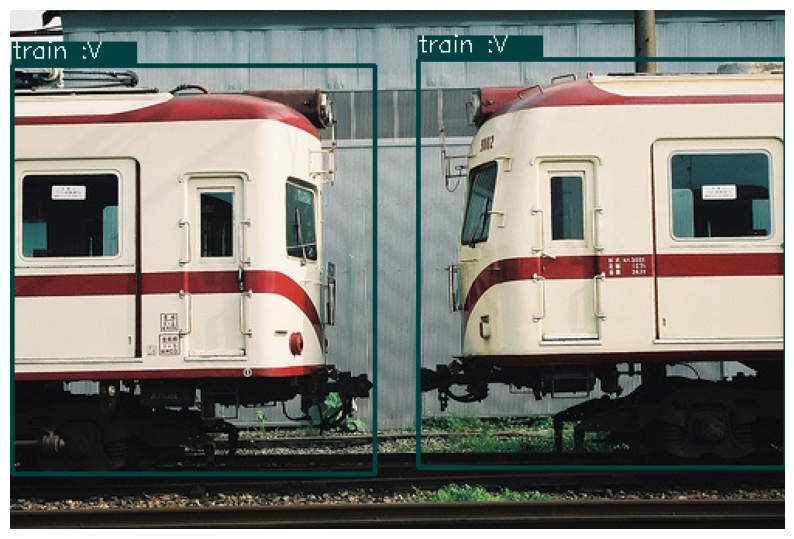

In [37]:
VOC_COLORS = {
    'aeroplane': (255, 0, 0),
    'bicycle': (0, 255, 0),
    'bird': (0, 0, 255),
    'boat': (255, 255, 0),
    'bottle': (255, 0, 255),
    'bus': (0, 255, 255),
    'car': (128, 0, 0),
    'cat': (0, 128, 0),
    'chair': (0, 0, 128),
    'cow': (128, 128, 0),
    'diningtable': (128, 0, 128),
    'dog': (0, 128, 128),
    'horse': (128, 128, 128),
    'motorbike': (64, 0, 0),
    'person': (0, 64, 0),
    'pottedplant': (0, 0, 64),
    'sheep': (64, 64, 0),
    'sofa': (64, 0, 64),
    'train': (0, 64, 64),
    'tvmonitor': (64, 64, 64)
}

def print_image(file_name, img_dir, annot_dir,
               display_image = True):
    
    file_name = file_name.split(".")[0]
    print("Filename:",file_name)
    image_file = os.path.join(img_dir, file_name + ".jpg")
    annot_file = os.path.join(annot_dir, file_name + ".xml")

    tree = ET.parse(annot_file)
    root = tree.getroot()
    
    objects = []
    
    for obj in root.findall('.//object'):
        obj_name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = bndbox.find('xmin').text
        ymin = bndbox.find('ymin').text
        xmax = bndbox.find('xmax').text
        ymax = bndbox.find('ymax').text
        
        objects.append((obj_name, int(xmin), int(ymin), int(xmax), int(ymax)))

    if display_image:
        image = cv2.imread(image_file)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image_org = image.copy()
        
        for obj in objects:
            print(obj)
            label, xmin, ymin, xmax, ymax = obj
            color = VOC_COLORS.get(label, (255, 255, 255))

            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), color, 2)

            # Draw the label
            text = f"{label} :V"
            cv2.rectangle(image, (xmin, ymin - 15), (xmin + len(text) * 10, ymin), color, -1)
            cv2.putText(image, text, (xmin, ymin - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        plt.figure(figsize = (10, 10))
        plt.imshow(image)
        plt.axis('off')
        plt.show()

        
    return image_org, image, objects

first_file = annotation_list[4].split(".")[0]
# first_file = "2007_005173"
img_org, img, bb = print_image(first_file, img_dir, annotation_dir)

In [26]:
# Create label to index dictionary
label2idx = {label: idx for idx, label in enumerate(VOC_COLORS.keys())}

# Create index to label dictionary
idx2label = {idx: label for idx, label in enumerate(VOC_COLORS.keys())}

## Writing the labels

In [34]:
def writing_labels(txt_dir, annot_dir, label2idx):
    with open(txt_dir, 'w') as f:
        i = 0
        for file in os.listdir(annot_dir):
            # Open XML file 
            annot_file = os.path.join(annot_dir, file)
            base_file = file.split(".")[0]
            
            tree = ET.parse(annot_file)
            root = tree.getroot()
            
            total_label = ""
            
            for obj in root.findall('.//object'):
                obj_name = obj.find('name').text
                bndbox = obj.find('bndbox')
                xmin = float(bndbox.find('xmin').text)
                ymin = float(bndbox.find('ymin').text)
                xmax = float(bndbox.find('xmax').text)
                ymax = float(bndbox.find('ymax').text)

                # Convert floats to integers
                xmin = int(xmin)
                ymin = int(ymin)
                xmax = int(xmax)
                ymax = int(ymax)

                total_label += f"{xmin} {ymin} {xmax} {ymax} {label2idx[obj_name]} "

                
            total_label = total_label.strip()
            
            image_file = base_file + ".jpg "
            if i != len(os.listdir(annot_dir)) - 1:
                total_label = image_file + total_label + "\n"
            else:
                total_label = image_file + total_label
                
            f.write(total_label)
            i += 1

            print(f"Finishing labeling: {file}")

text_dir = 'voc2012.txt'
writing_labels(text_dir, annotation_dir, label2idx)

Finishing labeling: 2007_000027.xml
Finishing labeling: 2007_000032.xml
Finishing labeling: 2007_000033.xml
Finishing labeling: 2007_000039.xml
Finishing labeling: 2007_000042.xml
Finishing labeling: 2007_000061.xml
Finishing labeling: 2007_000063.xml
Finishing labeling: 2007_000068.xml
Finishing labeling: 2007_000121.xml
Finishing labeling: 2007_000123.xml
Finishing labeling: 2007_000129.xml
Finishing labeling: 2007_000170.xml
Finishing labeling: 2007_000175.xml
Finishing labeling: 2007_000187.xml
Finishing labeling: 2007_000241.xml
Finishing labeling: 2007_000243.xml
Finishing labeling: 2007_000250.xml
Finishing labeling: 2007_000256.xml
Finishing labeling: 2007_000272.xml
Finishing labeling: 2007_000323.xml
Finishing labeling: 2007_000332.xml
Finishing labeling: 2007_000333.xml
Finishing labeling: 2007_000346.xml
Finishing labeling: 2007_000363.xml
Finishing labeling: 2007_000364.xml
Finishing labeling: 2007_000392.xml
Finishing labeling: 2007_000423.xml
Finishing labeling: 2007_000

## Testing the Images

Filename: 2007_000392
('horse', 100, 96, 355, 324)
('person', 198, 58, 286, 197)


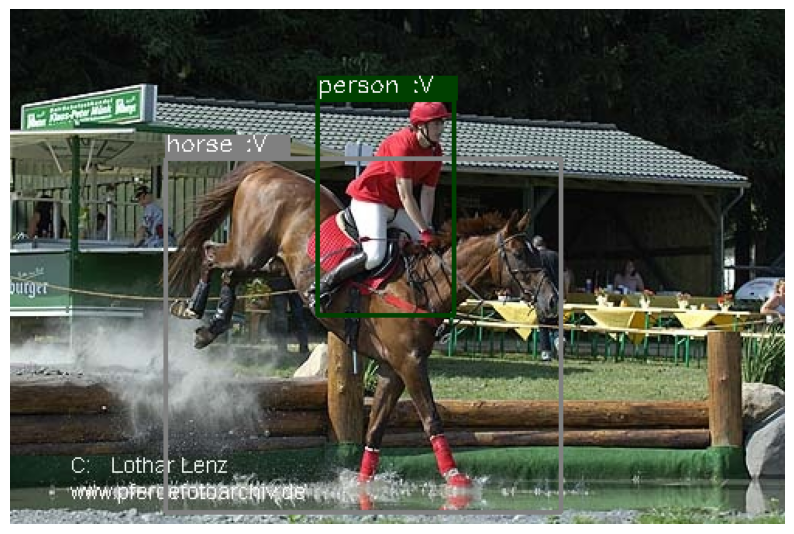

In [130]:
# VOC Image
first_file = annotation_list[25].split(".")[0]
# first_file = "2007_005173"
img_org, img, bb = print_image(first_file, img_dir, annotation_dir)

boxes = []
classes = []
for b in bb:
    c, x_min, y_min, x_max, y_max = b
    boxes.append([x_min, y_min, x_max, y_max])
    classes.append(label2idx[c])
    

boxes = torch.tensor(boxes, dtype = torch.float32)
classes = torch.tensor(classes)

In [131]:
boxes, classes

(tensor([[100.,  96., 355., 324.],
         [198.,  58., 286., 197.]]),
 tensor([12, 14]))

## Random Flip

(332, 500, 3)
tensor([[100.,  96., 355., 324.],
        [198.,  58., 286., 197.]])


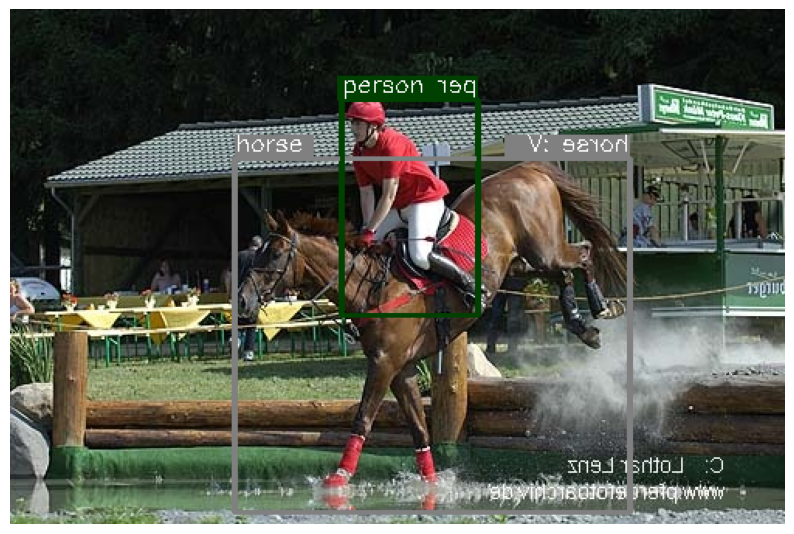

In [135]:
h, w, _ = img_org.shape

boxes_flip = boxes.clone()
img_flip = cv2.flip(img, 1)
print(img_flip.shape)
x_min, x_max = boxes_flip[:, 0], boxes_flip[:, 2]
xf_min, xf_max = w - x_max, w - x_min
boxes_flip[:, 0], boxes_flip[:, 2] = xf_min, xf_max 

print(boxes)
# img_flip = np.ascontiguousarray(img_flip, dtype=np.uint8)

for b, c in zip(boxes_flip, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_flip, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_flip, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_flip, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_flip)
plt.axis('off')
plt.show()


In [136]:
img_flip.dtype

dtype('uint8')

## Random Scale Horizontal

Scale ratio: 0.9


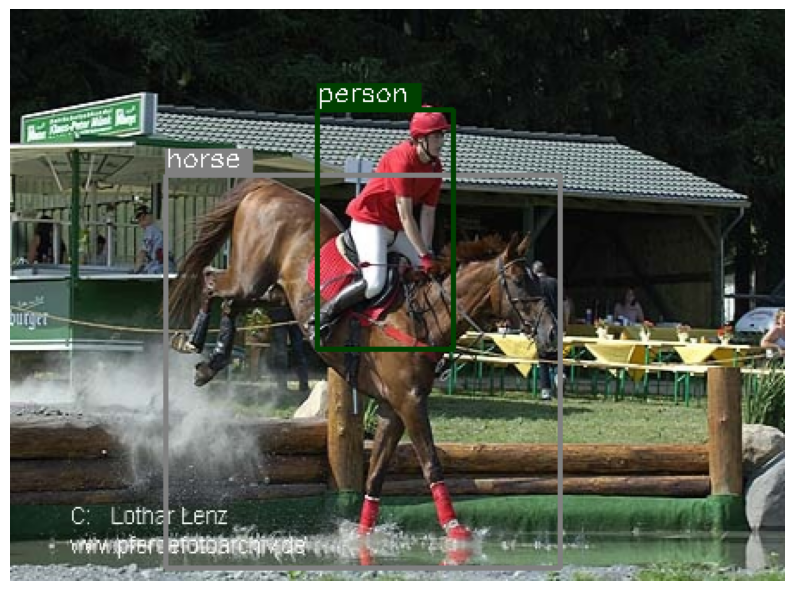

In [137]:
import random 

# scale = random.uniform(0.8, 1.2)
scale = 0.9
boxes_scale = boxes.clone()

print("Scale ratio:", scale)
h, w, _ = img.shape

new_w = int(scale * w)
img_scale = cv2.resize(img_org, (new_w, h),
                        interpolation=cv2.INTER_LINEAR)

scale_indices = torch.Tensor([[scale, 1, scale, 1]]).expand_as(boxes_scale)
boxes_scale = boxes_scale * scale_indices

for b, c in zip(boxes_scale, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_scale, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_scale, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_scale, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_scale)
plt.axis('off')
plt.show()

## Random Blur

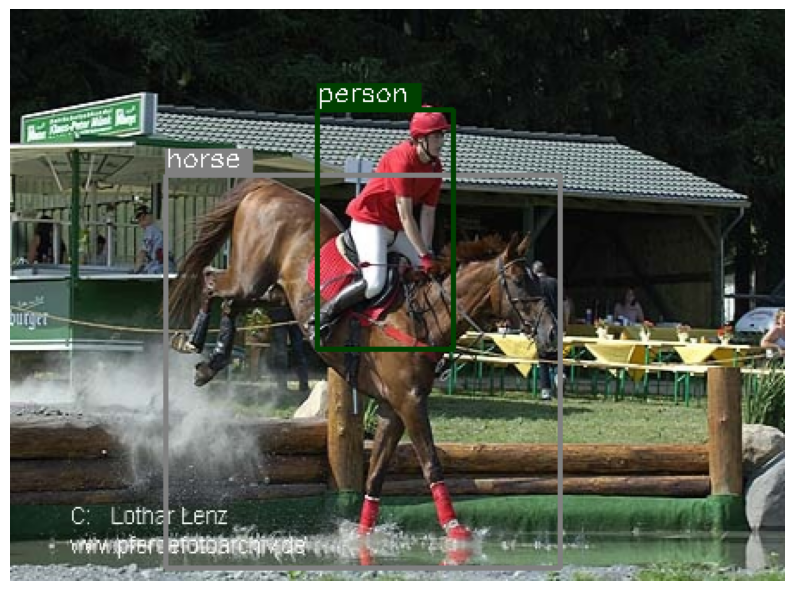

In [142]:
kernel = random.choice(range(1, 7, 2))

img_blur = cv2.GaussianBlur(img_org, (kernel, kernel), 0)

for b, c in zip(boxes, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_blur, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_blur, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_blur, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_scale)
plt.axis('off')
plt.show()

## Random Brightness

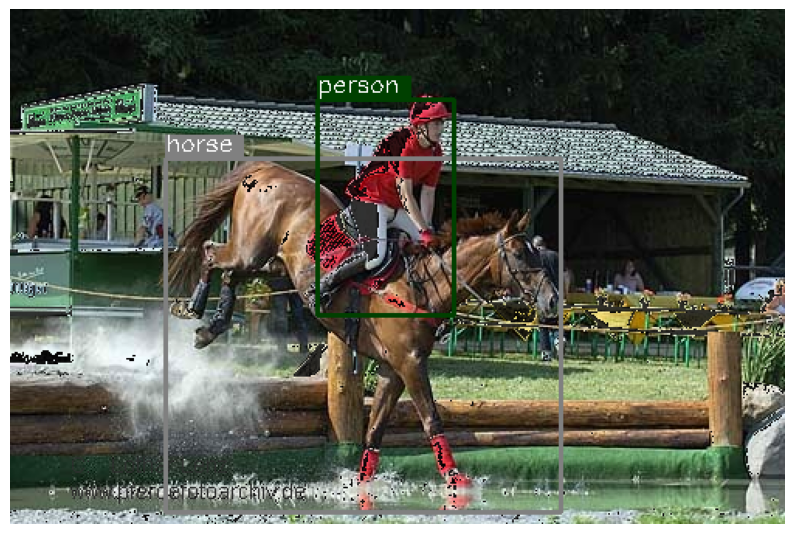

In [171]:
img_hsv = cv2.cvtColor(img_org, cv2.COLOR_RGB2HSV)
# print(img_hsv)
# adjust = random.uniform(0.5, 1.5)
adjust = 1.2
# print(adjust)
img_hsv[:, :, 2] = img_hsv[:, :, 2] * adjust
img_hsv[:, :, 2]  = np.clip(img_hsv[:, :, 2], 0, 255).astype(img_hsv.dtype)
# print(img_hsv[:, :, 2])

img_bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

for b, c in zip(boxes, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_bgr, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_bgr, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_bgr, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_bgr)
plt.axis('off')
plt.show()


In [167]:
np.clip([296, 235, 267, -12], 0, 255)

array([255, 235, 255,   0])

## Random Hue

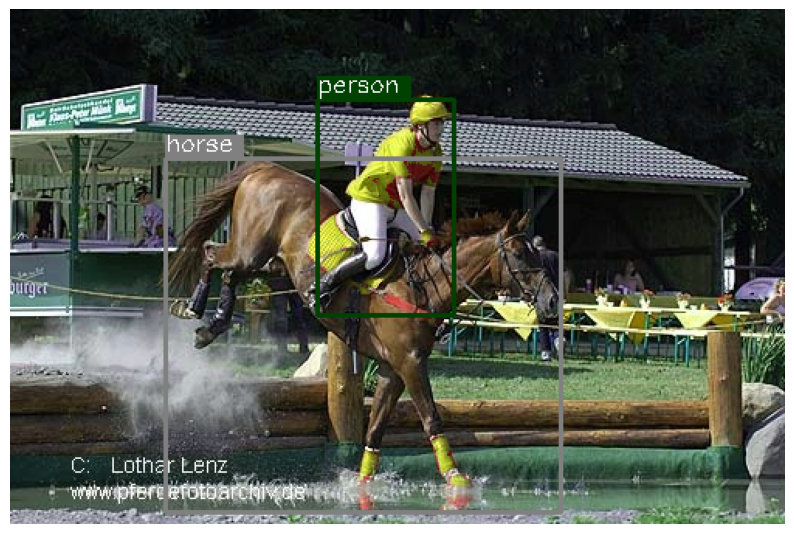

In [172]:
img_hsv = cv2.cvtColor(img_org, cv2.COLOR_RGB2HSV)
# print(img_hsv)
# adjust = random.uniform(0.5, 1.5)
adjust = 1.2
# print(adjust)
img_hsv[:, :, 0] = img_hsv[:, :, 0] * adjust
img_hsv[:, :, 0]  = np.clip(img_hsv[:, :, 0], 0, 255).astype(img_hsv.dtype)
# print(img_hsv[:, :, 2])

img_bgr = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

for b, c in zip(boxes, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_bgr, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_bgr, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_bgr, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_bgr)
plt.axis('off')
plt.show()


## Random Shift

Shifted x: 60, Shifted y: -15


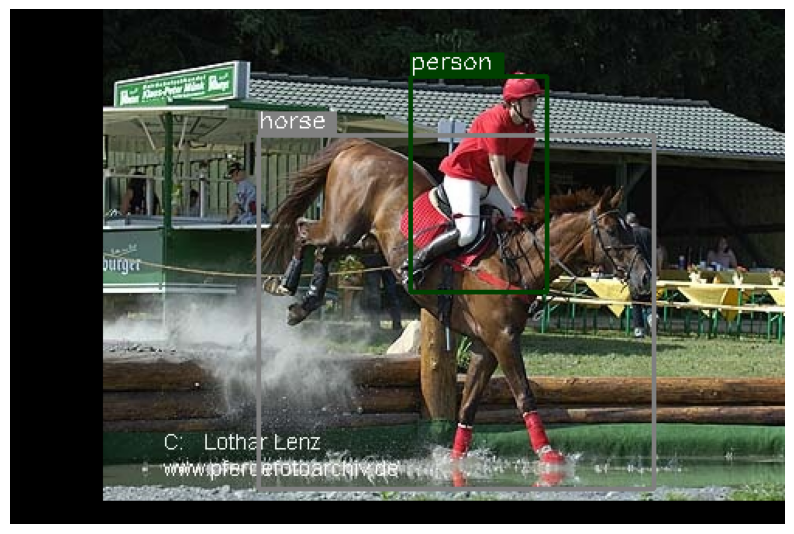

In [181]:
h, w, c = img_org.shape

img_shift = np.zeros((h, w, c), dtype = img_org.dtype)

dx = int(random.uniform(-w * 0.2, w * 0.2))
dy = int(random.uniform(-h * 0.2, h * 0.2))

print(f"Shifted x: {dx}, Shifted y: {dy}")

x_start = max(0, dx)
x_end = min(w, w + dx)
y_start = max(0, dy)
y_end = min(h, h + dy)

x_start_org = max(0, -dx)
x_end_org = min(w, w - dx)
y_start_org = max(0, -dy)
y_end_org = min(h, h - dy)

img_shift[y_start: y_end, x_start: x_end, :] = img_org[y_start_org:y_end_org, x_start_org:x_end_org, :]

boxes_shifted = boxes.clone()
shifted_tensor = torch.Tensor([[dx, dy, dx, dy]]).expand_as(boxes_shifted)
boxes_shifted = boxes_shifted + shifted_tensor

boxes_shifted[:, 0] = boxes_shifted[:, 0].clamp_(min = 0, max=w)
boxes_shifted[:, 2] = boxes_shifted[:, 2].clamp_(min = 0, max=w)
boxes_shifted[:, 1] = boxes_shifted[:, 1].clamp_(min = 0, max=h)
boxes_shifted[:, 3] = boxes_shifted[:, 3].clamp_(min = 0, max=h)

for b, c in zip(boxes_shifted, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_shift, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_shift, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_shift, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

plt.figure(figsize = (10, 10))
plt.imshow(img_shift)
plt.axis('off')
plt.show()



## Random Crop

Crop size y: 262, x: 404
(262, 404, 3)


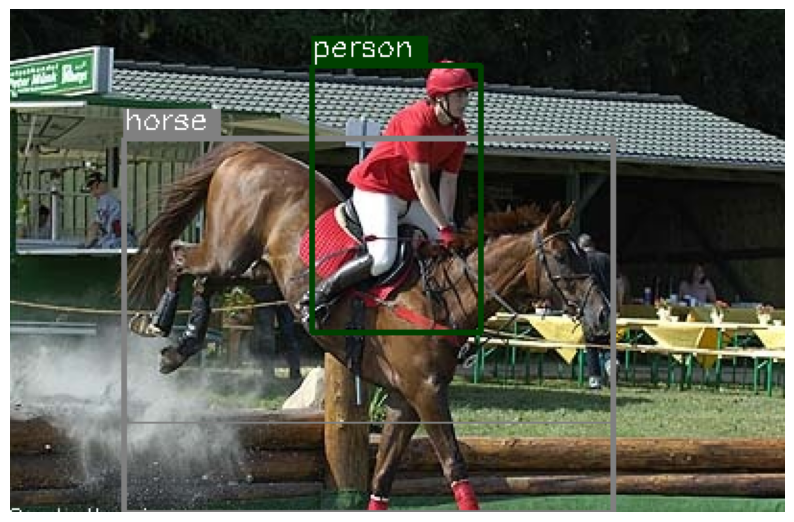

In [187]:
h_org, w_org, _ = img_org.shape

h = random.uniform(0.6 * h_org, h_org)
w = random.uniform(0.6 * w_org, w_org)
x = random.uniform(0, w_org - w)
y = random.uniform(0, h_org - h)
h, w, x, y = int(h), int(w), int(x), int(y)

print(f"Crop size y: {h}, x: {w}")
img_crop = img_org[y: y + h, x: x + w, :]

# Adjust the bounding boxes
boxes_cropped = boxes.clone()
boxes_cropped[:, [0, 2]] -= x
boxes_cropped[:, [1, 3]] -= y

# Clip the bounding boxes to be within the crop
boxes_cropped[:, 0] = np.clip(boxes_cropped[:, 0], 0, w)
boxes_cropped[:, 1] = np.clip(boxes_cropped[:, 1], 0, h)
boxes_cropped[:, 2] = np.clip(boxes_cropped[:, 2], 0, w)
boxes_cropped[:, 3] = np.clip(boxes_cropped[:, 3], 0, h)

# Valid Boxes
valid_boxes = (boxes_cropped[:, 2] > boxes_cropped[:, 0]) & \
                (boxes_cropped[:, 3] > boxes_cropped[:, 1])
boxes_cropped = boxes_cropped[valid_boxes]

for b, c in zip(boxes_cropped, classes) :
    x_min, y_min, x_max, y_max = b
    x_min, y_min, x_max, y_max = int(x_min.item()), int(y_min.item()), int(x_max.item()), int(y_max.item())
    
    color = VOC_COLORS.get(idx2label[c.item()], (255, 255, 255))

    cv2.rectangle(img_crop, (x_min, y_min), (x_max, y_max), color, 2)

    # x_min_point = (x_min, y_min)
    # x_max_point = (x_max, y_max)
    
    # cv2.circle(img_flip, x_min_point, radius=5, color=color, thickness=-1)  # Red dot at x_min
    # cv2.circle(img_flip, x_max_point, radius=5, color=color, thickness=-1)  # Green dot at x_max
    # Draw the label
    text = f"{idx2label[c.item()]}"
    cv2.rectangle(img_crop, (x_min, y_min - 15), (x_min + len(text) * 10, y_min), color, -1)
    cv2.putText(img_crop, text, (x_min, y_min - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

print(img_crop.shape)
plt.figure(figsize = (10, 10))
plt.imshow(img_crop)
plt.axis('off')
plt.show()